In [44]:
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import requests
import io

from numpy import array
from numpy import argmax
from numpy import percentile
from io import TextIOWrapper
from zipfile import ZipFile
from matplotlib.colors import LinearSegmentedColormap


In [2]:
# Files were previously uploaded from data cleaning onto Github repository.
# Just need to pull them up with the following:

feat_url = "https://raw.githubusercontent.com/jasmultani5391/Census-Data/master/featDF.csv"
download1 = requests.get(feat_url).content

complete_url = "https://raw.githubusercontent.com/jasmultani5391/Census-Data/master/completeDF.csv"
download2 = requests.get(complete_url).content

# Read the downloaded content and turn it into a pandas dataframe
featDF = pd.read_csv(io.StringIO(download1.decode('utf-8')))
completeDF = pd.read_csv(io.StringIO(download2.decode('utf-8')))

# Uncomment print to verify the files are being read correctly.
#print(featDF.head(0))
#print(completeDF.head(6))
#print(len(completeDF))

In [103]:
class FilterGroups():
    # Organizing columns once one-hot encoding is done.
    # This makes it easier to organize data for visual analysis.
    # So instead of 'maritalstatus_ wife', key becomes 'wife'
    # and value is the correlation weight to salary range as >50K)
    
    def make_corr_groups(self, dictionary):
        '''This task is to filter the final correlation dicitionary
        into groups--specifically for the originally qualitative
        columns that I applied one-hot encoding for.
        '''
        maritalstatus_corr = {}
        relationship_corr = {}
        occupation_corr = {}
        workclass_corr = {}
        race_corr = {}
        
        # Separate each [i] into respective group it belongs to,
        # and split up the name to its description.
        for key, value in dictionary.items():
            if 'maritalstatus' in key:
                key = key.split("_ ")
                key = key[1]
                maritalstatus_corr[key] = value
            if 'relationship_' in key:
                key = key.split("_ ")
                key = key[1]
                relationship_corr[key] = value
            if 'occupation_' in key:
                key = key.split("_ ")
                key = key[1]
                occupation_corr[key] = value
            if 'workclass_' in key:
                key = key.split("_ ")
                key = key[1]
                workclass_corr[key] = value
            if 'race_' in key:
                key = key.split("_ ")
                key = key[1]
                race_corr[key] = value
        return (maritalstatus_corr, relationship_corr,
                occupation_corr, workclass_corr,
                race_corr)
    
class VisualPlots():
    # This class allows us to visually plot different categories.
       
    def plot_group(self, column):
        ''' 
        You will return the bar plot of (count vs column). You
        should see three curves: (1) count of total sampel for column
        (2) count of those in >50K for the column and (3) count of those
        in the =<50K for the column of interest.
        '''
        # Set up total sample.
        sortedDF = completeDF.sort_values(column)
        totalcount = dict((sortedDF[column].value_counts()))
        total_keys = list(totalcount.keys())
        total_values = list(totalcount.values())
        
        # Initialize graph. 
        f, ax = plt.subplots(figsize=(15, 7))
        
        # Graph total sample as base dataset.
        sns.set_color_codes('pastel')
        ax = sns.barplot(x=total_keys,
                         y=total_values,
                         label='Total',
                         color='b'
                        )
                         
        # Graph each group.
        sns.set_color_codes('muted')
        ax = sns.countplot(x=column,
                           hue="salaryrange",
                           data=completeDF,
                           color='g'
                          )
        ax.legend(frameon=True)
        plt.xticks(rotation=65)
        plt.title('# of people by {} in group'.format(column),
                 fontsize=16
                 )
        plt.xlabel(column,
                  fontsize=16
                  )
        plt.ylabel('Count',
                  fontsize=16
                  )
        plt.show()
        return ax
        
    def scatter_3feats(self, x_val, y_val, z_val, dataframe, regression):
        '''
        This scatter plot allows us to compare against three socioeconomic
        factors (x_val, y_val, z_val) and they all must come from the same
        dataframe. The regression input can be either 'True' or 'False',
        this depends on if you want to also plot the regression line.
        '''
        ax = sns.lmplot(x=x_val,
                        y=y_val,
                        data=dataframe,
                        fit_reg=regression,
                        hue=z_val,
                        col=z_val,
                        col_wrap=2,
                        height=5,
                        scatter_kws={'alpha': 0.1}
                       )
        return ax

    def lineplot_dictionary(self, dictionary, x_values, y_values):
        '''
        This lineplot takes in three inputs. The first is the dictionary,
        the second is what you want to title the x-axis of your plot,
        and the third is what you want to title the y-axis of your plot.
        '''
        # Set up your x and y values.
        x1 = list(dictionary.keys())
        y1 = list(dictionary.values())
        
        # Set up structure of your lineplot.
        w = len(y1)
        plt.figure(figsize=(w, 3))
        plt.plot(x1,
                 y1,
                 'o--',
                 linewidth=2,
                 markersize=8)
        plt.xticks(rotation=45)
        plt.title("Relational {} Across {}".format(y_values, x_values),
                  fontsize=16
                 )
        plt.xlabel(x_values,
                   fontsize=16
                  )
        plt.ylabel(y_values,
                  fontsize=16
                  )
        return plt.show()
    
    def distplot_group(self, column, number):
        '''
        Similar to the plot_group method, but this method only overlays
        two datasets of interest: the total sample, and the group of interest.
        This is helpful if you feel like there are too many graphs clouding
        judgement.
        
        Input required is the column (in quotes) of interest within compelteDF
        and the salary group you want to see (1 for >50K and 0 for =<50K.)
        '''

        # Create empty dataframe and list.
        group50K = pd.DataFrame()
        grouplabel = []

        # Plot base database that has total sample.
        ax = sns.distplot(completeDF[column],
                          kde=False,
                          bins=100,
                          label = "Total Sample"
                         )

        # Overlay another dataset with your group of interest.
        # 1 for group that has salaryrange >50K, 0 for =<50K.
        if number==1:
            group50K = completeDF.loc[featDF['salary_label'] == 1]
            grouplabel = ['Above 50K Group']

        else:
            group50K = completeDF.loc[featDF['salary_label'] == 0]
            grouplabel = ['Below 50K Group']

        # Plot your group of interest
        ax = sns.distplot(group50K[column],
                          kde=False,
                          bins=100,
                          label = grouplabel
                         )

        # Set up structure of plot.
        plt.legend(prop={'size': 10})
        plt.title('# Individuals with ' + column, fontsize=18)
        plt.xlabel(column, fontsize=16)
        plt.ylabel('Count', fontsize=16)
        xlimit = (percentile(completeDF[column], 99.9) + 500)
        ylimit = ((list(completeDF[column].value_counts()))[1] + 100)
        plt.xlim([0,xlimit])
        plt.ylim([0,ylimit])
        plt.show()
        return ax
    
    


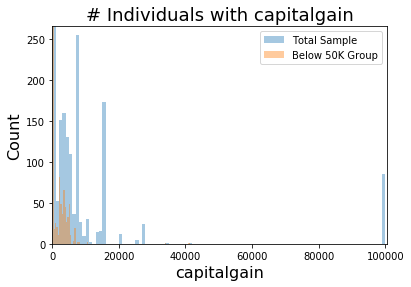

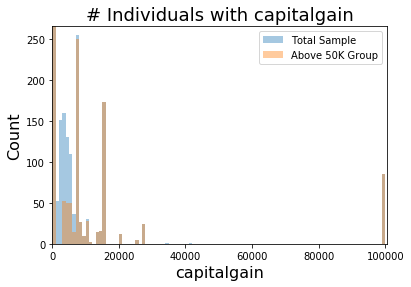

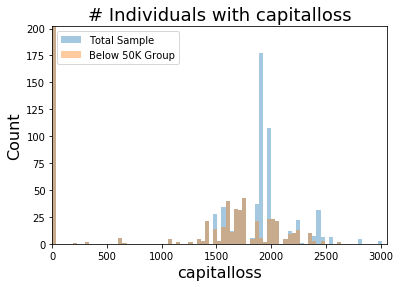

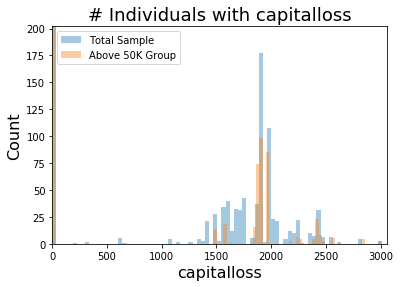

0        14958
15024      166
7688       126
7298       118
99999       85
         ...  
6097         1
7978         1
1731         1
7896         1
3273         1
Name: capitalgain, Length: 113, dtype: int64
0       15518
1902      102
1977       85
1887       74
2415       23
        ...  
1594        1
2282        1
1421        1
653         1
1911        1
Name: capitalloss, Length: 82, dtype: int64
16281


In [102]:
plotting = VisualPlots()
capitalgain_below = plotting.distplot_group('capitalgain', 0)
capitalgain_above = plotting.distplot_group('capitalgain', 1)

capitalloss_below = plotting.distplot_group('capitalloss', 0)
capitalloss_above = plotting.distplot_group('capitalloss', 1)

print((completeDF['capitalgain'].value_counts()))
print((completeDF['capitalloss'].value_counts()))
print(len(completeDF))

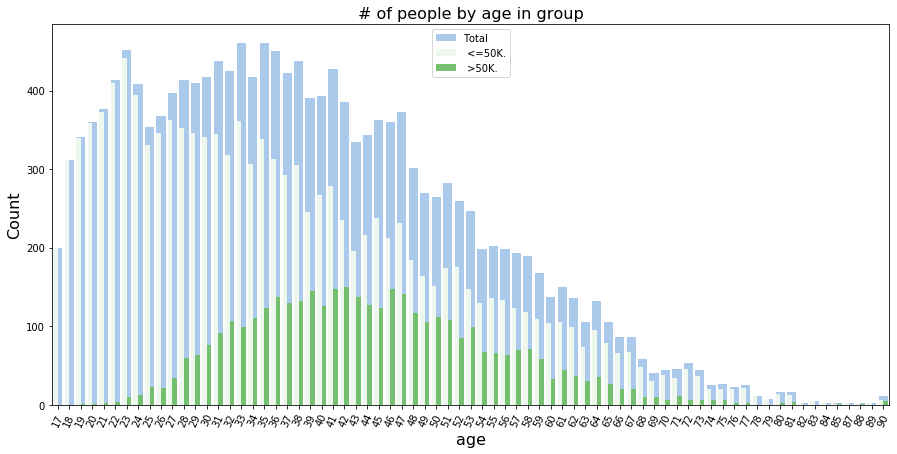

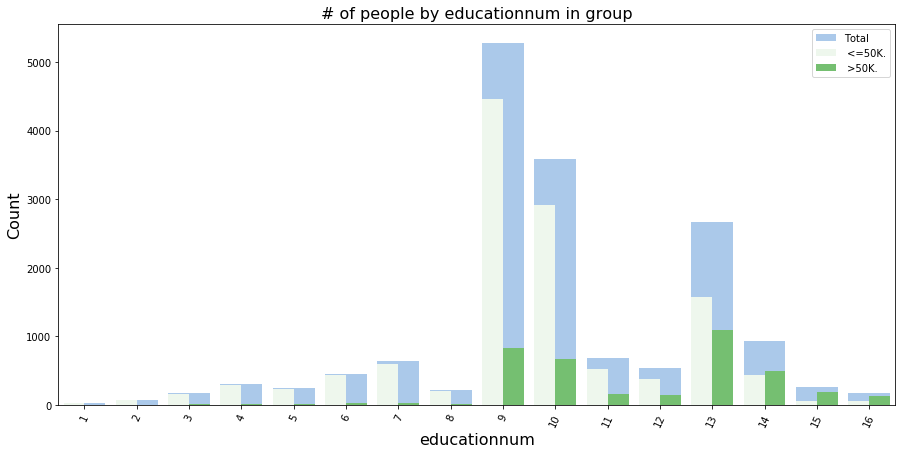

In [4]:
age_plot = plotting.plot_group('age')
education_plot = plotting.plot_group('educationnum')

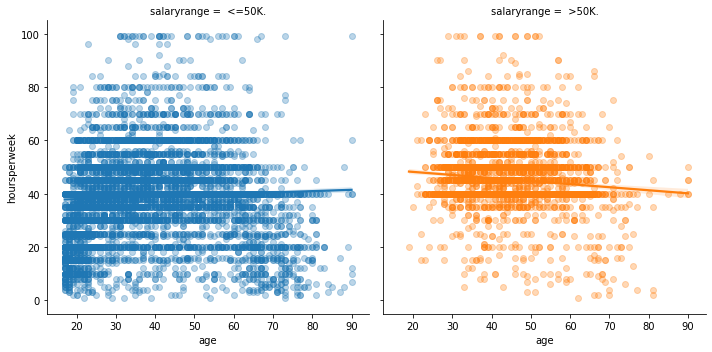

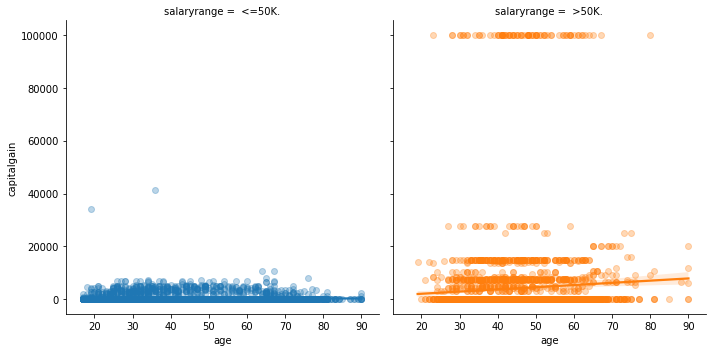

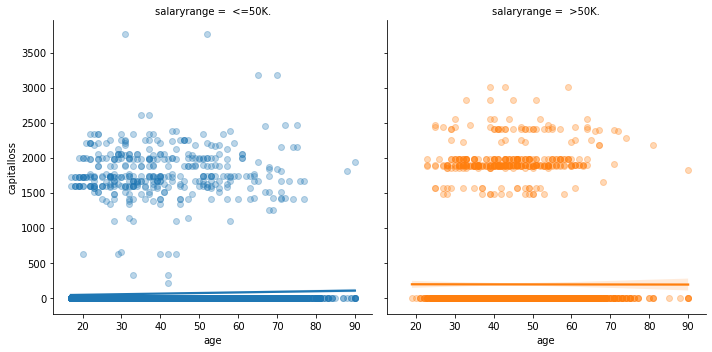

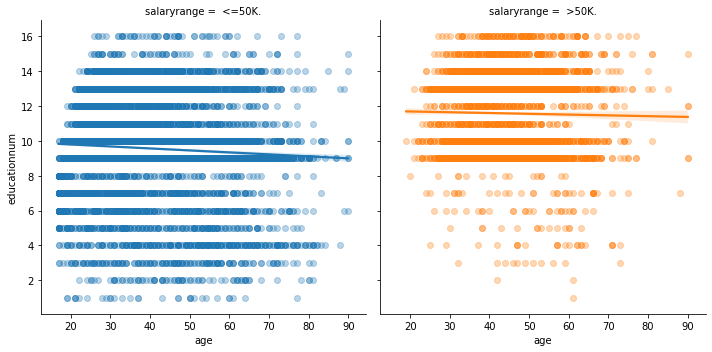

In [105]:
# Two scatter plots, one for <50K label and another for >50k label to
# study the spread of age and hours worked per week. This could be
# helpful for someone who wants to narrow down the model and fit it
# only for individuals who are above legal working age or before
# retirement. It could also be interesting to see which individuals
# are relying on being part of a double-income family to contribute
# to their home salary.

scttr_age_hours = plotting.scatter_3feats('age',
                                          'hoursperweek',
                                          'salaryrange',
                                          completeDF,
                                          True
                                         )

# Scatterplot that studies spread of age vs capital gain and compares
# the spread between groups.
scttr_age_capgain = plotting.scatter_3feats('age',
                                            'capitalgain',
                                            'salaryrange',
                                            completeDF,
                                            True
                                           )

# Scatterplot that studies spread of age vs education and compares
# the spread between groups. There's a clear line distinguishing
# level 8 (12th grade) in the >50K group.
scttr_age_edu_salary = plotting.scatter_3feats('age',
                                               'educationnum',
                                               'salaryrange',
                                               completeDF,
                                               True
                                              )

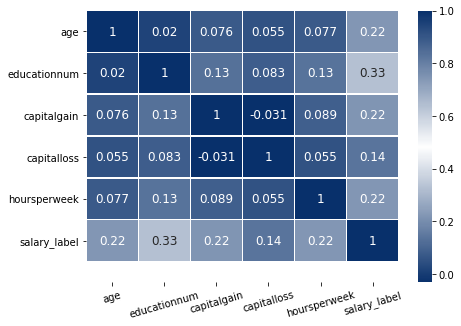

In [13]:
# Creating a heatmap to visualize which numeric columns correlate
# with salary label. # From the following printout, we see that
# education number, age, hours per week, and capital gain are roughly
# the highest correlators

# I want to add the featDF['salary_label'] because it contains the
# numerical value (0 or 1)to represent the salary range (>50K, <=50K).
# The former data layout is better formatted for the "corr.()" function.
completeDF['salary_label'] = featDF['salary_label']
corr = completeDF.corr()
min_color = 'white'
max_color = (0.03137254,
             0.18823529411,
             0.41960784313,
             1
             )

cmap = LinearSegmentedColormap.from_list("", [max_color,
                                              min_color,
                                              max_color
                                              ]
                                         )

# Visualize correlation with heatmap.
fig, ax = plt.subplots(figsize=(7, 5))
fig = sns.heatmap(corr,
                  annot=True,
                  cmap=cmap,
                  xticklabels=corr.columns.values,
                  yticklabels=corr.columns.values,
                  cbar=True,
                  linewidths=.5,
                  annot_kws={"fontsize":12},
                  ax=ax
                  )
plt.xticks(rotation=16)
fig.set_ylim(6.5, 0)  # First value should be (#of rows) + (.5).
fig.xaxis.set_tick_params(labelsize=10)
fig.yaxis.set_tick_params(labelsize=10)
plt.show()

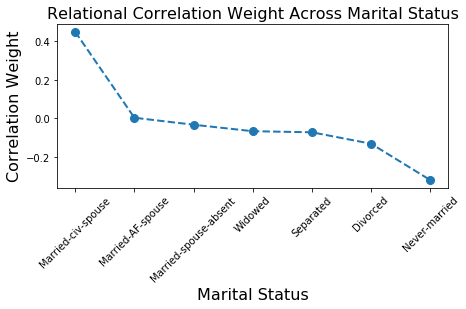

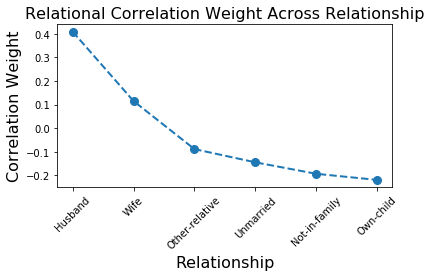

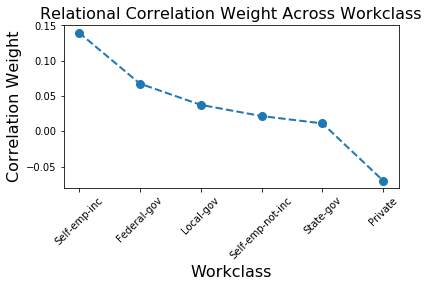

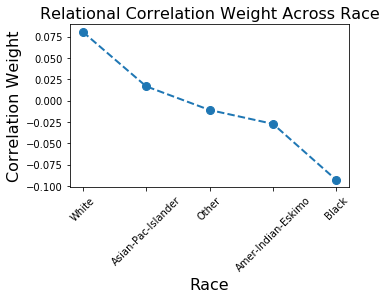

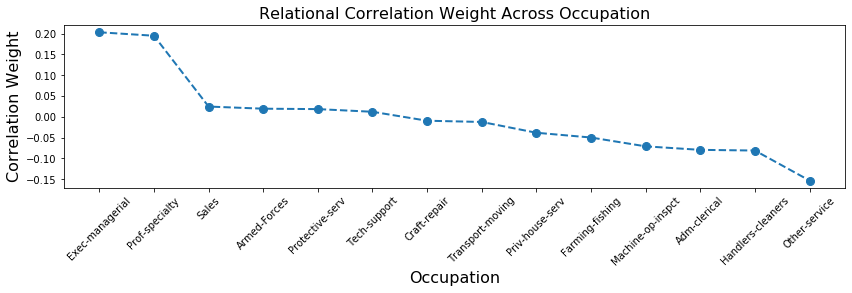

In [16]:
# However, the heatmap does not illuminate how qualitative features
# differentially effect correlation with the salary label. Here,
# Next, I want to go through all the one-hot encoded columns and
# see which have the highest correlation to salary_label.
featDF.describe()
values_corr = featDF.corr()
salary_corr = values_corr.iloc[-2]
salary_corr = salary_corr.sort_values(ascending=False)
salary_corrdict = dict(salary_corr)

salary_corr_filter = FilterGroups()
make_corr_groups = salary_corr_filter.make_corr_groups(salary_corrdict)

maritalstatus_corrs = make_corr_groups[0]
relationship_corrs = make_corr_groups[1]
occupation_corrs = make_corr_groups[2]
workclass_corrs = make_corr_groups[3]
race_corrs = make_corr_groups[4]

# Lineplot to reveal distribution of correlation weights for each
# qualitative dictionary. Correlation assessment follows the rule:
# High correlation : +/- .50 <= x < 1.0
# Moderate correlation: +/- .30 <= x <= .49
# Low correlation: 0 < x <= +/- .29
plotting = VisualPlots()
marital_lineplot = plotting.lineplot_dictionary(maritalstatus_corrs,
                                                'Marital Status',
                                                'Correlation Weight'
                                               )

relationship_lineplot = plotting.lineplot_dictionary(relationship_corrs,
                                                     'Relationship',
                                                     'Correlation Weight'
                                                    )

workclass_lineplot = plotting.lineplot_dictionary(workclass_corrs,
                                                  'Workclass',
                                                  'Correlation Weight'
                                                 )

race_lineplot = plotting.lineplot_dictionary(race_corrs,
                                             'Race',
                                             'Correlation Weight'
                                            )

occupation_lineplot = plotting.lineplot_dictionary(occupation_corrs,
                                                   'Occupation',
                                                   'Correlation Weight'
                                                  )
